In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

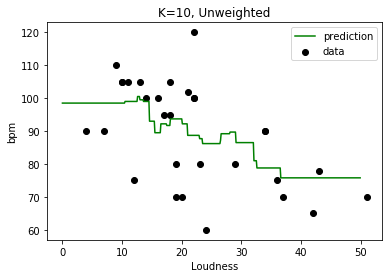

In [2]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

T = np.arange(0, 50, .1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')

plt.xlabel('Loudness')
plt.ylabel('bpm')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

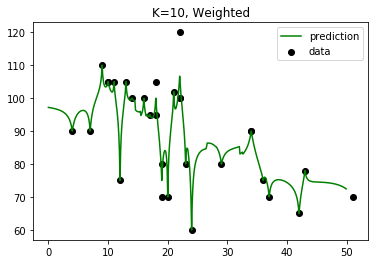

In [3]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

T = np.arange(0, 50, .1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [4]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


## This is where the assignment starts!

I will first run the previous knn model but this time it will be with the additional feature and unweighted.

Then I will run it again but weighted.

Then I will play around with the n_neighbors argument to try to get the best scores I can.

In [67]:
knn_2 = neighbors.KNeighborsRegressor(n_neighbors=8)
X2 = pd.DataFrame({'loudness' : stats.zscore(music.loudness), 'duration' : stats.zscore(music.duration)})
Y2 = music.bpm
knn_2.fit(X2, Y2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')

In [68]:
knn_3 = neighbors.KNeighborsRegressor(n_neighbors=19, weights='distance')
X3 = pd.DataFrame({'loudness' : stats.zscore(music.loudness), 'duration' : stats.zscore(music.duration)})
Y3 = music.bpm
knn_3.fit(X3, Y3)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='distance')

In [69]:
score_2 = cross_val_score(knn_2, X2, Y2, cv=5)

In [70]:
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_2.mean(), score_2.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.91)


In [71]:
score_3 = cross_val_score(knn_3, X3, Y3, cv=5)

In [72]:
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_3.mean(), score_3.std() * 2))

Weighted Accuracy: -0.13 (+/- 0.71)


I played around with it and I think the answer is "No, I can't get it any better." The average R-squared values are still negative. Showing that a horizontal line at the mean would predict better than the models I have come up with.